<a href="https://colab.research.google.com/github/americasUnwanted/Python/blob/main/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests

import requests

target_url ='http://www.gutenberg.org/files/2265/2265.txt'

response = requests.get(target_url)

data = response.text

In [2]:
import nltk
%matplotlib inline

nltk.download('stopwords')

nltk.download('wordnet')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from textblob import TextBlob
from pathlib import Path

blob=TextBlob(data)

In [4]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [5]:
items = blob.word_counts.items()

In [6]:
items = [item for item in items if item[0] not in stop_words]

In [7]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [8]:
import pandas as pd
top20 = sorted_items[1:21]

df = pd.DataFrame(top20, columns=['word', 'count']) 
df

,word,count
0,lord,211
1,haue,175
2,king,173
3,shall,107
4,hamlet,106
5,come,106
6,thou,105
7,let,104
8,good,99
9,hor,95


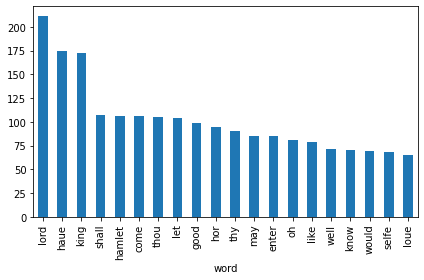

In [9]:
axes = df.plot.bar(x='word', y='count', legend=False)

import matplotlib.pyplot as plt

plt.gcf().tight_layout()

In [10]:
import imageio

image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"

mask_image = imageio.imread(image_file)

In [11]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=1000,
                      colormap='prism', mask=mask_image, background_color='white')

In [12]:
wordcloud = wordcloud.generate(data)

In [13]:
wordcloud = wordcloud.to_file('hamlet.png')

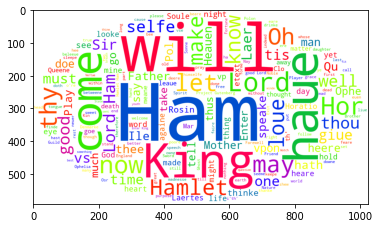

In [14]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)